In [6]:
using Catlab
using Catlab.WiringDiagrams
using Catlab.Doctrines
import Catlab.Doctrines.⊗
import Base: ∘

using Catlab.Graphics
import Catlab.Graphics: Graphviz

show_diagram(d::WiringDiagram) = to_graphviz(d,
    direction=:vertical,
    labels=true, label_attr=:xlabel,
    node_attrs=Graphviz.Attributes(
        :fontname => "Courier",
    ),
    edge_attrs=Graphviz.Attributes(
        :fontname => "Courier",
    )
)

⊗(a::WiringDiagram, b::WiringDiagram) = otimes(a, b)
∘(a::WiringDiagram, b::WiringDiagram) = compose(b, a)
⊚(a,b) = b ∘ a

⊚ (generic function with 1 method)

In [50]:
# =====================================================================
# Translated lambda functions for SIR-simple model from Python to Julia
# =====================================================================
function assg__rec(γ, I, δt)
    return (γ*I) * δt
end

function assg__inf(β, S, I, R, δt)
    return (-(β*S*I) / (S+I+R)) * δt
end

function assg__I1(I, infected, recovered)
    return I + infected - recovered
end

function assg__R1(R, recovered)
    return R + recovered
end

function assg__S1(S, infected)
    return S - infected
end

function ID(x)
    return x
end

ID (generic function with 1 method)

In [91]:
# ==================================================================================
# Translated wiring of the SIR-simple model from GrFN to WiringDiagram specification
# ==================================================================================
β, S0, I0, R0, δt, γ = Ob(FreeSymmetricMonoidalCategory, :β, :S0, :I0, :R0, :δt, :γ)
rec, S1, I1, R1, inf = Ob(FreeSymmetricMonoidalCategory, :rec, :S1, :I1, :R1, :inf)
A, B, C, D = Ob(FreeSymmetricMonoidalCategory, :A, :B, :C, :D)


w0_0 = WiringDiagram(Hom(ID, S0, S0))
w0_1 = WiringDiagram(Hom(ID, I0, I0))
w0_2 = WiringDiagram(Hom(ID, R0, R0))
println(mcopy(Ports([A])))
w1_0 = WiringDiagram(Hom(assg__rec, γ ⊗ I0 ⊗ δt, rec))
w1_1 = WiringDiagram(Hom(assg__inf, β ⊗ S0 ⊗ I0 ⊗ R0 ⊗ δt, inf))

w2_0 = WiringDiagram(Hom(assg__S1, S0 ⊗ inf, S1))
w2_1 = WiringDiagram(Hom(assg__I1, I0 ⊗ inf ⊗ rec, I1))
w2_2 = WiringDiagram(Hom(assg__R1, R0 ⊗ rec, R1))

w3_0 = (w1_1 ⊚ mcopy(codom(w1_1), 2))       # Double the codomain of inf
w3_1 = (w1_0 ⊚ mcopy(codom(w1_0), 2))       # Double the codomain of rec
w3_2 = (w0_0 ⊗ w3_0 ⊗ w0_1 ⊗ w3_1 ⊗ w0_2)   # Create full second layer domain
w3_3 = w3_2 ⊚ (w2_0 ⊗ w2_1 ⊗ w2_2)          # Compose the second layer with outputs

println(w3_3)

WiringDiagram([A], [A,A], 
[ 1 => {inputs},
  2 => {outputs},
   ],
[ Wire((1,1) => (2,1)),
  Wire((1,1) => (2,2)) ])
WiringDiagram([:S0,:β,:S0,:I0,:R0,:δt,:I0,:γ,:I0,:δt,:R0], [:S1,:I1,:R1], 
[ 1 => {inputs},
  2 => {outputs},
  3 => Box(assg__R1, [:R0,:rec], [:R1]),
  4 => Box(assg__S1, [:S0,:inf], [:S1]),
  5 => Box(ID, [:I0], [:I0]),
  6 => Box(ID, [:R0], [:R0]),
  7 => Box(ID, [:S0], [:S0]),
  8 => Box(assg__rec, [:γ,:I0,:δt], [:rec]),
  9 => Box(assg__inf, [:β,:S0,:I0,:R0,:δt], [:inf]),
  10 => Box(assg__I1, [:I0,:inf,:rec], [:I1]) ],
[ Wire((1,7) => (5,1)),
  Wire((1,11) => (6,1)),
  Wire((1,1) => (7,1)),
  Wire((1,8) => (8,1)),
  Wire((1,9) => (8,2)),
  Wire((1,10) => (8,3)),
  Wire((1,2) => (9,1)),
  Wire((1,3) => (9,2)),
  Wire((1,4) => (9,3)),
  Wire((1,5) => (9,4)),
  Wire((1,6) => (9,5)),
  Wire((3,1) => (2,3)),
  Wire((4,1) => (2,1)),
  Wire((5,1) => (10,2)),
  Wire((6,1) => (3,2)),
  Wire((7,1) => (4,1)),
  Wire((8,1) => (3,1)),
  Wire((8,1) => (10,3)),
  Wire((9,1) => (

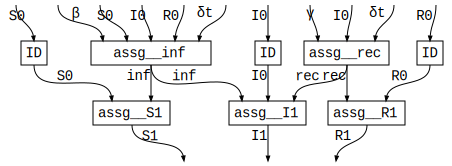

In [88]:
show_diagram(w3_3)